# NOTE:
target_size = () -- it is basically a tuple containing images height and width that can be extracted from photos..

In [2]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as B

import matplotlib.pyplot as plt

In [10]:
# re-size all the images to this
IMAGE_SIZE = (224, 224)  #we have to keep all images sizes as (225,225)

train_path = 'HeroPhotos/Train'
valid_path = 'HeroPhotos/Test'

In [11]:
if B.image_data_format() == 'channels_first':
    input_shape = (3,) + IMAGE_SIZE
else:
    input_shape = IMAGE_SIZE + (3,)

In [12]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=input_shape, weights='imagenet', include_top=False)#WEIHGTS are taken from 'imagenet'
#'include_top = False' is required because we don't need input layer to be added...instead we use our own required input.

   The default input size for VGG16() model is 224x224  and it must have 3 input channels(rgb)...


In [13]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

In [14]:
from glob import glob
# useful for getting number of classes i.e no. of folders present in Train...
folders = glob('HeroPhotos/Train/*')
folders

['HeroPhotos/Train\\AlluArjun',
 'HeroPhotos/Train\\NTR',
 'HeroPhotos/Train\\Prabhas',
 'HeroPhotos/Train\\Vijay']

In [15]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
#x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
#we shouldn't use add() here...

In [16]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [17]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [64]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
               width_shift_range = 0.2,
               height_shift_range = 0.2,
               shear_range =0.2,
               zoom_range = 0.2,
               horizontal_flip = True,
               fill_mode = 'nearest')



#### NOTE:
    'rgba' : will have 4 channels to our image..

In [66]:
test_datagen = ImageDataGenerator(rescale = 1./255)


'ImageDataGenerator' - generates (no. of images in our training dataset) * (no. of arguments specified in ImageDataGenerator)

In [67]:
training_set = train_datagen.flow_from_directory('HeroPhotos/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('HeroPhotos/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 20 images belonging to 4 classes.
Found 4 images belonging to 4 classes.


In [68]:
test_set

In [70]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  #steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
1/1 [==============================] - 1s 527ms/step - loss: 0.6868 - accuracy: 0.7000 - val_loss: 1.5249 - val_accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 1s 552ms/step - loss: 0.5216 - accuracy: 0.8500 - val_loss: 1.5538 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 1s 564ms/step - loss: 0.5184 - accuracy: 0.8000 - val_loss: 1.6687 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 1s 595ms/step - loss: 0.6556 - accuracy: 0.7500 - val_loss: 1.6563 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 1s 753ms/step - loss: 0.3378 - accuracy: 0.8500 - val_loss: 1.5739 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 1s 757ms/step - loss: 0.4036 - accuracy: 0.8000 - val_loss: 1.4776 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 1s 755ms/step - loss: 0.3466 - accuracy: 0.9000 - val_loss: 1.4822 - val_accuracy: 0.2500
Epoch 8/10
1/1 [====

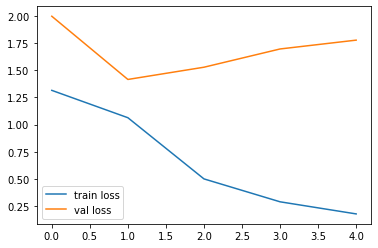

In [16]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')


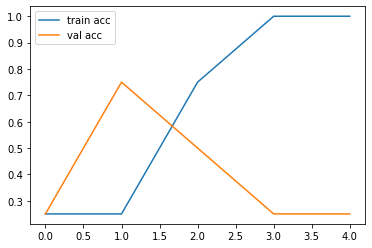

In [17]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

# saving the model

In [53]:

model.save('facefeatures_new_model.h5')


The model.save() includes:
    - The model architecture, allowing to re-instantiate the model.
    - The model weights.
    - The state of the optimizer, allowing to resume training
        exactly where you left off.


# Loading the model and testing 

In [1]:
from tensorflow.keras.models import load_model


In [2]:
model = load_model('facefeatures_new_model.h5')
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [5]:
import numpy as np 
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
img = load_img('HeroPhotos/Test/Vijay/Vijay.jpg', target_size = (224,224))
img = img_to_array(img)

img = img.reshape(1,224,224,3)  #img = np.expand_dims(img, axis = 0)  #we have to reshape according to model trained shape..
img.shape


(1, 224, 224, 3)

In [6]:
pred = model.predict(img)

In [7]:
pred

array([[0., 0., 0., 1.]], dtype=float32)

In [8]:
from glob import glob
# useful for getting number of classes i.e no. of folders present in Train...
folders = glob('HeroPhotos/Train/*')
folders

['HeroPhotos/Train\\AlluArjun',
 'HeroPhotos/Train\\NTR',
 'HeroPhotos/Train\\Prabhas',
 'HeroPhotos/Train\\Vijay']

In [9]:
folder = []
for strings in folders:
    iter = strings.split('\\')
    folder.append(iter)
folder

[['HeroPhotos/Train', 'AlluArjun'],
 ['HeroPhotos/Train', 'NTR'],
 ['HeroPhotos/Train', 'Prabhas'],
 ['HeroPhotos/Train', 'Vijay']]

In [10]:
Hero = []
for name in folder:
    Hero.append(name[1])
    
Hero

['AlluArjun', 'NTR', 'Prabhas', 'Vijay']

In [11]:
index = 0
for i in pred:
    for j in i:
        if (j == 1):
            break
        index += 1
        
print(Hero[index])

Vijay
